<a href="https://colab.research.google.com/github/Tirta2241720045/PCVK_Ganjil_2024/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama: Tirta Nurrochman Bintang Prawira
# NIM: 2241720045
# NO: 27
# Kelas: TI-3A

# D PRAKTIKUM FILTER

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.
2. Berikut merupakan langkah-langkah yang dapat dilakukan:
- Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan
pada akun github seperti pada modul sebelumnya.
- Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Kode ini buat ngehubungin Google Colab ke Google Drive. Jadi nanti kamu bisa akses file di Drive lewat path `/content/drive`. Tinggal kasih izin aja waktu muncul permintaan akses.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Kode ini buat import beberapa library penting:

- `numpy` (np) untuk operasi numerik dan matriks.
- `matplotlib.pyplot` (plt) untuk menampilkan grafik atau gambar.
- `cv2` (cv) dari OpenCV buat pemrosesan gambar.
- `math` untuk fungsi matematika dasar.
- `cv2_imshow` buat nampilin gambar di Colab (karena Colab enggak bisa pakai `cv2.imshow` biasa).
- `PIL` buat ngolah gambar sebagai objek dari Python Imaging Library (PIL).

- Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.

In [29]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padding_height, padding_width = image.shape

  output_height = (padding_height - kernel_height) // stride + 1
  output_width = (padding_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

Fungsi ini melakukan operasi konvolusi 2D pada gambar menggunakan kernel:

- `np.pad` menambahkan padding di sekitar gambar sesuai nilai `padding`.
- Kemudian, ukuran output dihitung berdasarkan ukuran gambar dan kernel dengan mempertimbangkan stride.
- Loop `for` menggeser kernel di seluruh gambar, menghitung hasil dot product antara bagian gambar dan kernel, lalu menyimpannya di `new_image`.

- Load citra yang akan diproses dan ubah menjadi citra keabuan

In [30]:
img = cv.imread('/content/drive/MyDrive/dataset/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

Kode ini buat baca gambar dan mengubahnya jadi grayscale:

- `cv.imread` membuka gambar dari path yang diberikan dan disimpan dalam variabel `img`.
- `cv.cvtColor` mengubah gambar warna (`BGR`) menjadi gambar grayscale (`GRAY`) dan hasilnya disimpan di `img_gray`.

- Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:

In [31]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

Kode ini mendefinisikan kernel untuk efek sharpen (penajaman):

- Kernel 3x3 ini terdiri dari nilai yang digunakan untuk menonjolkan detail dan kontras di gambar.
- Nilai pusat `5` akan menonjolkan piksel, sementara nilai `-1` di sekitar pusatnya akan mengurangi piksel di sekitarnya, menciptakan efek penajaman.

- Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:


In [32]:
convolution2d(img_gray, kernel_sharpen, 1, 2)

array([[   0.,  -48.,  -46., ..., -133., -133.,    0.],
       [ -48.,  146.,   91., ...,  267.,  400., -133.],
       [ -48.,   98.,   45., ...,  131.,  263., -132.],
       ...,
       [  -5.,   10.,    7., ...,   82.,  193.,  -91.],
       [  -6.,   19.,   13., ...,  158.,  313.,  -96.],
       [   0.,   -6.,   -6., ...,  -76.,  -96.,    0.]], dtype=float32)

Kode ini menerapkan konvolusi dengan kernel penajaman pada gambar grayscale:

- Fungsi `convolution2d` akan menggeser kernel penajaman (`kernel_sharpen`) di seluruh gambar (`img_gray`), menggunakan stride 1 dan padding 2.
- Hasilnya adalah gambar yang telah diproses dengan efek penajaman, yang menyaring dan menonjolkan detail di gambar tersebut.

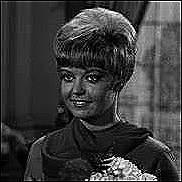

In [33]:
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

Kode ini menampilkan hasil konvolusi penajaman pada gambar menggunakan `cv2_imshow`:

- Fungsi `convolution2d` dipanggil untuk menerapkan kernel penajaman pada gambar grayscale dengan stride 1 dan padding 2.
- Hasilnya kemudian ditampilkan langsung di Colab menggunakan `cv2_imshow`.

3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

In [38]:
# Sharpen Filter
kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])
result_sharpen = convolution2d(img_gray, kernel_sharpen, 1, 1)

# Emboss Filter
kernel_emboss = np.array([[-2, -1,  0],
                          [-1,  1,  1],
                          [ 0,  1,  2]])
result_emboss = convolution2d(img_gray, kernel_emboss, 1, 1)

# Left Sobel Edge Detection
kernel_sobel_left = np.array([[ 1,  0, -1],
                              [ 2,  0, -2],
                              [ 1,  0, -1]])
result_sobel_left = convolution2d(img_gray, kernel_sobel_left, 1, 1)

# Canny Edge Detection (approximation)
kernel_canny = np.array([[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]])
result_canny = convolution2d(img_gray, kernel_canny, 1, 1)

# Prewitt Edge Detection
kernel_prewitt = np.array([[-1, -1, -1],
                           [ 0,  0,  0],
                           [ 1,  1,  1]])
result_prewitt = convolution2d(img_gray, kernel_prewitt, 1, 1)

# 5x5 Gaussian Blur
kernel_gaussian_5x5 = np.array([[1,  4,  6,  4, 1],
                                [4, 16, 24, 16, 4],
                                [6, 24, 36, 24, 6],
                                [4, 16, 24, 16, 4],
                                [1,  4,  6,  4, 1]]) / 256
result_gaussian_5x5 = convolution2d(img_gray, kernel_gaussian_5x5, 1, 2)

# 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel_21x21 = gaussian_kernel @ gaussian_kernel.T
result_gaussian_21x21 = convolution2d(img_gray, gauss_kernel_21x21, 1, 10)


Kode ini melakukan berbagai operasi pemrosesan gambar menggunakan berbagai jenis filter dan kernel:

1. **Sharpen Filter**: Menggunakan kernel penajaman (`kernel_sharpen`) untuk meningkatkan detail gambar.
2. **Emboss Filter**: Menggunakan kernel embos (`kernel_emboss`) yang memberi efek bayangan 3D pada gambar.
3. **Left Sobel Edge Detection**: Mendeteksi tepi gambar secara horizontal menggunakan kernel Sobel kiri (`kernel_sobel_left`).
4. **Canny Edge Detection (Approximation)**: Mendeteksi tepi gambar menggunakan kernel yang menyerupai Canny Edge Detection (`kernel_canny`).
5. **Prewitt Edge Detection**: Mendeteksi tepi gambar menggunakan kernel Prewitt (`kernel_prewitt`), fokus pada tepi vertikal.
6. **5x5 Gaussian Blur**: Menggunakan kernel Gaussian untuk mereduksi noise dengan ukuran kernel 5x5 (`kernel_gaussian_5x5`).
7. **21x21 Gaussian Blur**: Menggunakan kernel Gaussian dengan ukuran 21x21 (`gauss_kernel_21x21`) untuk efek blur yang lebih kuat.

Setiap filter dihasilkan dengan memanggil fungsi `convolution2d` pada gambar grayscale (`img_gray`), dengan parameter stride 1 dan padding yang disesuaikan (2 untuk Gaussian blur, 1 untuk lainnya).

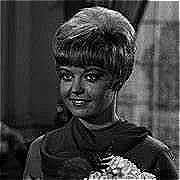

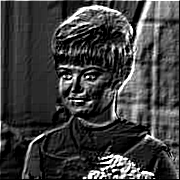

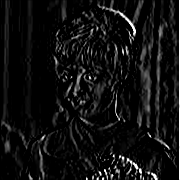

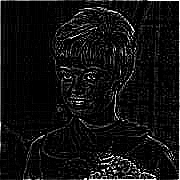

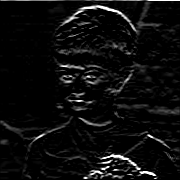

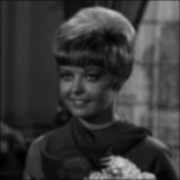

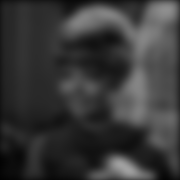

In [39]:
cv2_imshow(result_sharpen)
cv2_imshow(result_emboss)
cv2_imshow(result_sobel_left)
cv2_imshow(result_canny)
cv2_imshow(result_prewitt)
cv2_imshow(result_gaussian_5x5)
cv2_imshow(result_gaussian_21x21)

Kode ini menampilkan hasil dari setiap filter yang diterapkan pada gambar:

- `cv2_imshow(result_sharpen)` menampilkan gambar dengan efek penajaman.
- `cv2_imshow(result_emboss)` menampilkan gambar dengan efek embos (bayangan 3D).
- `cv2_imshow(result_sobel_left)` menampilkan hasil deteksi tepi menggunakan filter Sobel kiri.
- `cv2_imshow(result_canny)` menampilkan hasil deteksi tepi dengan filter yang menyerupai Canny.
- `cv2_imshow(result_prewitt)` menampilkan hasil deteksi tepi menggunakan filter Prewitt.
- `cv2_imshow(result_gaussian_5x5)` menampilkan gambar dengan efek blur menggunakan kernel Gaussian 5x5.
- `cv2_imshow(result_gaussian_21x21)` menampilkan gambar dengan efek blur menggunakan kernel Gaussian 21x21.

Setiap gambar akan ditampilkan satu per satu sesuai urutan kode.